In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm
from xgcm import Grid

In [2]:
def open_IC():
    IC = xr.open_dataset('ISOMIP_IC.nc')
    return IC


In [3]:
IC = open_IC()
IC.h

<xarray.DataArray 'h' (Time: 1, Layer: 36, lath: 2, lonh: 40)>
[2880 values with dtype=float64]
Coordinates:
  * lath     (lath) float64 2.5 7.5
  * lonh     (lonh) float64 322.5 327.5 332.5 337.5 ... 502.5 507.5 512.5 517.5
  * Layer    (Layer) float64 1.027e+03 1.027e+03 ... 1.028e+03 1.028e+03
  * Time     (Time) timedelta64[ns] 00:00:00
Attributes:
    long_name:  Layer Thickness
    units:      m
    checksum:   DE06B62FC6405B9E

In [4]:
!pwd

/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/layer


In [5]:
ave = False ## True means use 5 daily average rather than hourly prog
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/'
def open_files(folder):
    base = basee + folder
    if ave:
        prog = xr.open_dataset(base + '/ave_prog.nc')
    else:
        prog = xr.open_dataset(base + '/prog.nc')
    ocean_static = xr.open_dataset(base + "/ocean_geometry.nc")
    return prog, ocean_static
def open_IC(folder):
    base = basee + folder
    IC = xr.open_dataset(base + '/ISOMIP_IC.nc')
    return IC
def open_Initialstate(folder):
    base = basee + folder
    IC = xr.open_dataset(base + '/Initial_state.nc')
    return IC

In [40]:
folder = 'layer'
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    #prog, ocean_static = open_files(label)
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    depth = grid.interp(prog.e,'x')
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if varname == "uo": dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) #Dummy, just for have z_levels
    # plot variable in colours
    xi, yyi = np.meshgrid(xx[yy0,:], yi) #We repeat the horizontal part of the grid by the number of zlevels
    #cax = ax.contourf(xi,yy[tt,...],dataplot[tt,:,yy0,:],levels = levels, cmap = cmap, extend = 'both',corner_mask = False)
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


`TS_CONFIG = "fit"` so it's okay

melt = 0.02988981


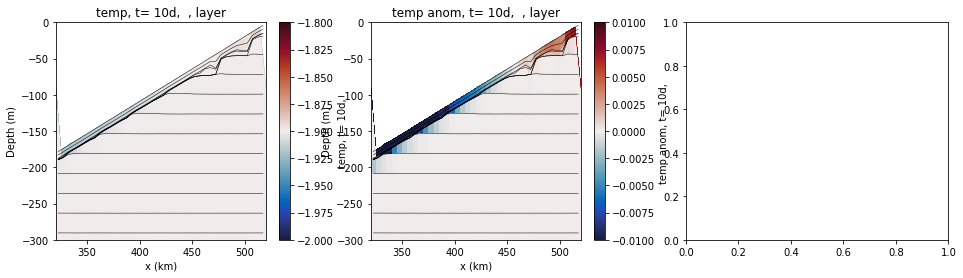

In [54]:
label = 'layer'

fig, axes = plt.subplots(ncols = 3, figsize = (16,4))
prog = xr.open_dataset('output/prog_flat.nc')
x = 1
time = -1
ymax = 300
plot(axes[0],x,time,0,prog.temp,"temp, t= 10d, ",-2,-1.8,cm.cm.balance,ymax)

plot(axes[1],x,time,0,prog.temp - prog.temp.isel(Time = 0),"temp anom, t= 10d, ",-0.01,0.01,cm.cm.balance,ymax)
ice = xr.open_dataset('output/ice_flat.nc')
print('melt = '+str(ice.melt_rate.isel(Time = -1).mean().values))

melt = 0.029998038


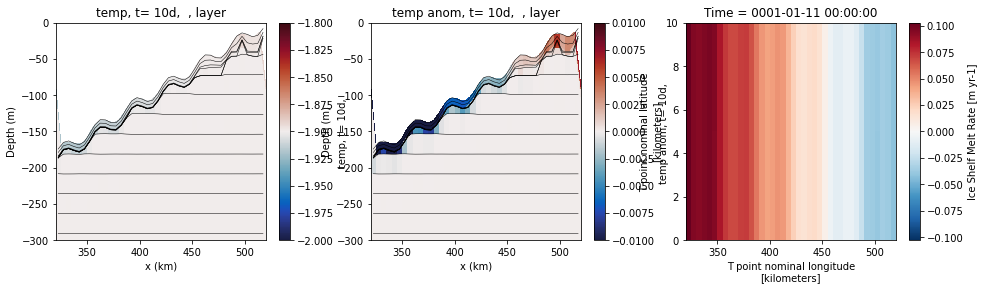

In [55]:
label = 'layer'

fig, axes = plt.subplots(ncols = 3, figsize = (16,4))
prog = xr.open_dataset('output/prog_curvy.nc')
x = 1
time = -1
ymax = 300
plot(axes[0],x,time,0,prog.temp,"temp, t= 10d, ",-2,-1.8,cm.cm.balance,ymax)

plot(axes[1],x,time,0,prog.temp - prog.temp.isel(Time = 0),"temp anom, t= 10d, ",-0.01,0.01,cm.cm.balance,ymax)
ice = xr.open_dataset('output/ice_curvy.nc')
ice.melt_rate.isel(Time = -1).plot(ax = axes[2])
print('melt = '+str(ice.melt_rate.isel(Time = -1).mean().values))

melt = 0.030007118


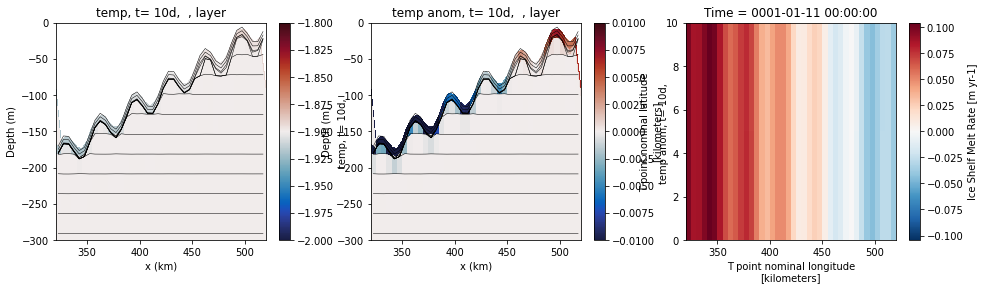

In [56]:
label = 'layer'

fig, axes = plt.subplots(ncols = 3, figsize = (16,4))
prog = xr.open_dataset('output/prog_verycurvy.nc')
x = 1
time = -1
ymax = 300
plot(axes[0],x,time,0,prog.temp,"temp, t= 10d, ",-2,-1.8,cm.cm.balance,ymax)

plot(axes[1],x,time,0,prog.temp - prog.temp.isel(Time = 0),"temp anom, t= 10d, ",-0.01,0.01,cm.cm.balance,ymax)
ice = xr.open_dataset('output/ice_verycurvy.nc')
ice.melt_rate.isel(Time = -1).plot(ax = axes[2])
print('melt = '+str(ice.melt_rate.isel(Time = -1).mean().values))

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_32763/478159390.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


melt = 0.030007118


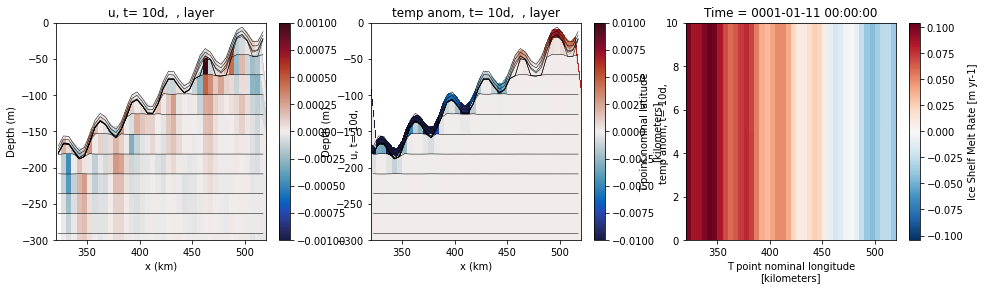

In [60]:
label = 'layer'

fig, axes = plt.subplots(ncols = 3, figsize = (16,4))
prog = xr.open_dataset('output/prog_verycurvy.nc')
x = 1
time = -1
ymax = 300
plot(axes[0],x,time,0,prog.u,"u, t= 10d, ",-0.001,0.001,cm.cm.balance,ymax)

plot(axes[1],x,time,0,prog.temp - prog.temp.isel(Time = 0),"temp anom, t= 10d, ",-0.01,0.01,cm.cm.balance,ymax)
ice = xr.open_dataset('output/ice_verycurvy.nc')
ice.melt_rate.isel(Time = -1).plot(ax = axes[2])
print('melt = '+str(ice.melt_rate.isel(Time = -1).mean().values))